## Exploratory data analysis
Dataset: `iot_telemetry`

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# criar a pasta "data" no Drive para armazenar o arquivo csv.
# !mkdir /content/gdrive/MyDrive/data
# baixar csv do github e salvar na pasta data
# !wget -O /content/gdrive/MyDrive/data/iot_telemetry.csv https://raw.githubusercontent.com/fscheidt/iotdb-21/master/dataset/telemetry/iot_telemetry_data.csv

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/data/iot_telemetry.csv")

In [5]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [6]:
# temperatura media
df['temp'].mean()

22.453987345642783

In [7]:
# Maxima e mínima
df['temp'].max(), df['temp'].min()

(30.60000038146973, 0.0)

In [8]:
# maxima e minima humidade
df['humidity'].max(), df['humidity'].min()

(99.9000015258789, 1.100000023841858)

In [9]:
# Humidade e temperatura são correlacionadas?

df['temp'].corr(df['humidity'])

-0.41042710022441636

In [10]:
# correlação entre todas características:
df.corr(method ='pearson')

# podemos ver que co e smoke possuem uma alta correlação

,ts,co,humidity,light,lpg,motion,smoke,temp
ts,1.000000,0.025757,0.017752,-0.020868,0.014178,-0.006911,0.016349,0.074443
co,0.025757,1.000000,-0.656750,-0.230197,0.997331,-0.000706,0.998192,0.110905
humidity,0.017752,-0.656750,1.000000,0.079703,-0.672113,-0.009826,-0.669863,-0.410427
light,-0.020868,-0.230197,0.079703,1.000000,-0.208926,0.033594,-0.212969,0.747485
lpg,0.014178,0.997331,-0.672113,-0.208926,1.000000,0.000232,0.999916,0.136396
motion,-0.006911,-0.000706,-0.009826,0.033594,0.000232,1.000000,0.000062,0.037649
smoke,0.016349,0.998192,-0.669863,-0.212969,0.999916,0.000062,1.000000,0.131891
temp,0.074443,0.110905,-0.410427,0.747485,0.136396,0.037649,0.131891,1.000000


In [11]:
# correlação entre co e smoke
df['co'].corr(df['smoke'])

0.998192423186554

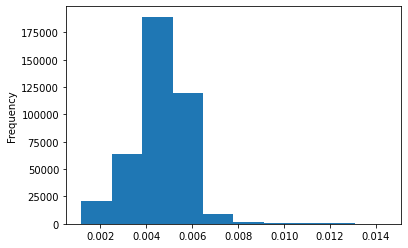

In [12]:
# visualizando a distribuição da variável co:
df['co'].plot(kind='hist')

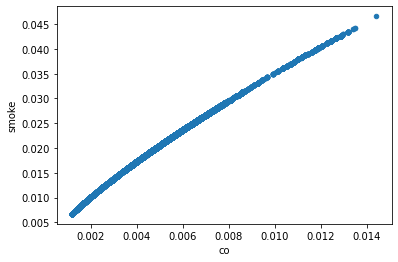

In [13]:
# visualizando a correlação:
df.plot(x="co", y="smoke", kind="scatter")

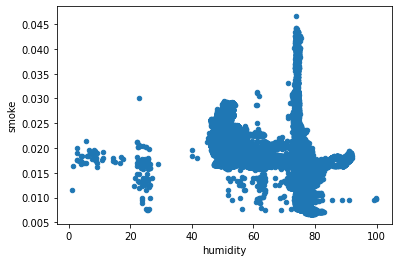

In [14]:
df.plot(x="humidity", y="smoke", kind="scatter")

In [15]:
# podemos facilmente adicionar uma nova coluna, nesse caso a media da temperatura
df['av_temp'] = df['temp'].rolling(window=5).mean()

In [16]:
df['av_temp']

0           NaN
1           NaN
2           NaN
3           NaN
4         22.92
          ...  
405179    21.92
405180    22.52
405181    23.38
405182    22.76
405183    21.88
Name: av_temp, Length: 405184, dtype: float64

In [17]:
df['av_temp'] = df['av_temp'].fillna(df['temp'].mean())
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,av_temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,22.453987
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,22.453987
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,22.453987
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,22.453987
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,22.920000


In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,12)

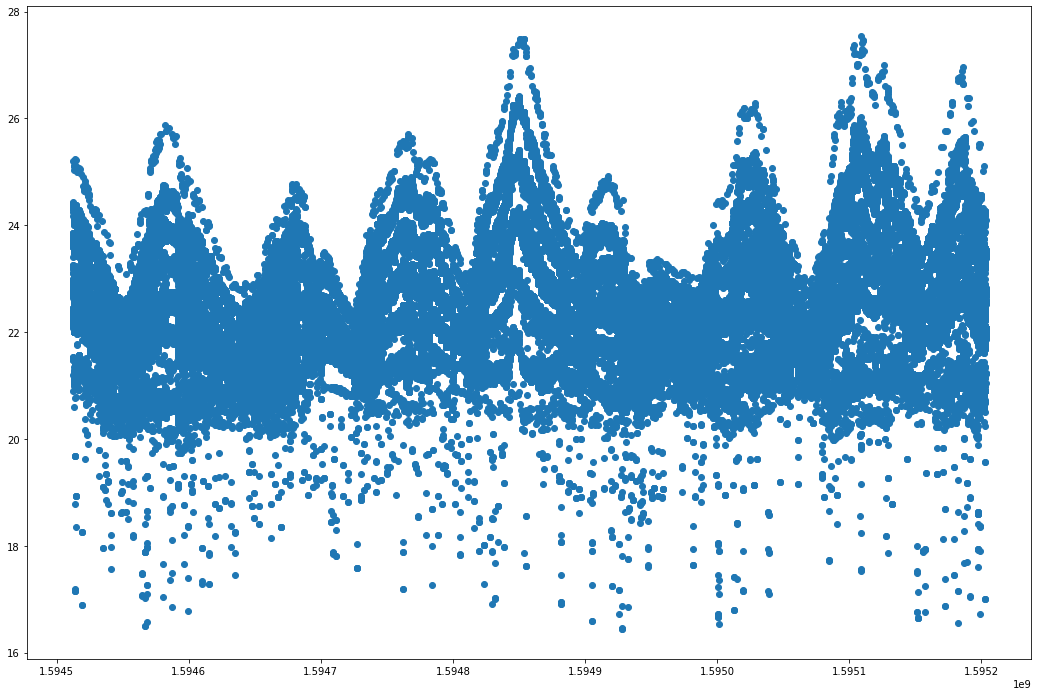

In [19]:
plt.plot(df['ts'], df['av_temp'], 'o')